# **Applied Data Science - Space Y Project**

##### Nesse projeto, nós iremos atuar como cientistas de dados analisando os lançamentos da SpaceX para montar um modelo de Machine Learning capaz de aprender as capacidades e requisitos de sucesso efetuados pela SpaceX para "fundarmos" uma nossa empresa, chamada SpcaeY, que consiga competir de igual para igual com a sua homônima.

##### Para iniciarmos esse projeto, iremos importar todos os dados necessários da API SpaceX disposta no GitHub.

In [117]:
import requests
import numpy as np
import datetime as dt
import pandas as pd


# Agora utilizaremos a biblioteca request para puxar os dados que queremos da API.

url = "https://api.spacexdata.com/v4/launches/past"

response = requests.get(url)
response.json()

df = pd.json_normalize(response.json())
df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [118]:
# Diante do mesmo método, iremos buscar as matrizes estatísticas do projeto.

static_json_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/API_call_spacex_api.json'

response_static = requests.get(static_json_url)

df_static = pd.json_normalize(response_static)

df.head()

,static_fire_date_utc,static_fire_date_unix,net,window,rocket,success,failures,details,crew,ships,...,links.reddit.media,links.reddit.recovery,links.flickr.small,links.flickr.original,links.presskit,links.webcast,links.youtube_id,links.article,links.wikipedia,fairings
0,2006-03-17T00:00:00.000Z,1.142554e+09,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 33, 'altitude': None, 'reason': 'mer...",Engine failure at 33 seconds and loss of vehicle,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=0a_00nJ_Y88,0a_00nJ_Y88,https://www.space.com/2196-spacex-inaugural-fa...,https://en.wikipedia.org/wiki/DemoSat,NaN
1,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 301, 'altitude': 289, 'reason': 'har...",Successful first stage burn and transition to ...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=Lk4zQ2wP-Nc,Lk4zQ2wP-Nc,https://www.space.com/3590-spacex-falcon-1-roc...,https://en.wikipedia.org/wiki/DemoSat,NaN
2,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,False,"[{'time': 140, 'altitude': 35, 'reason': 'resi...",Residual stage 1 thrust led to collision betwe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=v0w9p3U8860,v0w9p3U8860,http://www.spacex.com/news/2013/02/11/falcon-1...,https://en.wikipedia.org/wiki/Trailblazer_(sat...,NaN
3,2008-09-20T00:00:00.000Z,1.221869e+09,False,0.0,5e9d0d95eda69955f709d1eb,True,[],Ratsat was carried to orbit on the first succe...,[],[],...,None,None,[],[],None,https://www.youtube.com/watch?v=dLQ2tZEH6G0,dLQ2tZEH6G0,https://en.wikipedia.org/wiki/Ratsat,https://en.wikipedia.org/wiki/Ratsat,NaN
4,None,NaN,False,0.0,5e9d0d95eda69955f709d1eb,True,[],None,[],[],...,None,None,[],[],http://www.spacex.com/press/2012/12/19/spacexs...,https://www.youtube.com/watch?v=yTaIDooc8Og,yTaIDooc8Og,http://www.spacex.com/news/2013/02/12/falcon-1...,https://en.wikipedia.org/wiki/RazakSAT,NaN


In [119]:
# Agora criaremos funções que irão obter dados sobre diferentes aspectos do lançamento bem sucedido do Falcon 9

# Rocket
def getBoosterVersion(data):
    for x in data['rocket']:
       if x:
        response = requests.get("https://api.spacexdata.com/v4/rockets/"+str(x)).json()
        BoosterVersion.append(response['name'])

# Launchpad
def getLaunchSite(data):
    for x in data['launchpad']:
       if x:
         response = requests.get("https://api.spacexdata.com/v4/launchpads/"+str(x)).json()
         Longitude.append(response['longitude'])
         Latitude.append(response['latitude'])
         LaunchSite.append(response['name'])

# Paylaod
def getPayloadData(data):
    for load in data['payloads']:
       if load:
        response = requests.get("https://api.spacexdata.com/v4/payloads/"+load).json()
        PayloadMass.append(response['mass_kg'])
        Orbit.append(response['orbit'])

# Cores
def getCoreData(data):
    for core in data['cores']:
            if core['core'] != None:
                response = requests.get("https://api.spacexdata.com/v4/cores/"+core['core']).json()
                Block.append(response['block'])
                ReusedCount.append(response['reuse_count'])
                Serial.append(response['serial'])
            else:
                Block.append(None)
                ReusedCount.append(None)
                Serial.append(None)
            Outcome.append(str(core['landing_success'])+' '+str(core['landing_type']))
            Flights.append(core['flight'])
            GridFins.append(core['gridfins'])
            Reused.append(core['reused'])
            Legs.append(core['legs'])
            LandingPad.append(core['landpad'])

In [120]:
# Mantém em nosso dataframe apenas as características desejadas.
df = df[['rocket', 'payloads', 'launchpad', 'cores', 'flight_number', 'date_utc']]

# Remove as linhas com múltiplos cores
df = df[df['cores'].map(len)==1]
df = df[df['payloads'].map(len)==1]

# Extrai um único valor das características abaixo
df['cores'] = df['cores'].map(lambda x : x[0])
df['payloads'] = df['payloads'].map(lambda x : x[0])

# Usa datetime para converter a data
df['date'] = pd.to_datetime(df['date_utc']).dt.date

# Restringe o critério de data
df = df[df['date'] <= dt.date(2020, 11, 13)]

# Variáveis globais
BoosterVersion = []
PayloadMass = []
Orbit = []
LaunchSite = []
Outcome = []
Flights = []
GridFins = []
Reused = []
Legs = []
LandingPad = []
Block = []
ReusedCount = []
Serial = []
Longitude = []
Latitude = []

# Realiza o BoosterVersion e fazendo a call de nossas funções acima para com a API Rest.
getBoosterVersion(df)
BoosterVersion[0:5]

getLaunchSite(df)

getPayloadData(df)

getCoreData(df)

In [121]:
# Formmula nosso dataset com base nos dados obtidos e que serão valiosos para a análise do nosso modelo.
launch_dict = {'FlightNumber': list(df['flight_number']),
'Date': list(df['date']),
'BoosterVersion':BoosterVersion,
'PayloadMass':PayloadMass,
'Orbit':Orbit,
'LaunchSite':LaunchSite,
'Outcome':Outcome,
'Flights':Flights,
'GridFins':GridFins,
'Reused':Reused,
'Legs':Legs,
'LandingPad':LandingPad,
'Block':Block,
'ReusedCount':ReusedCount,
'Serial':Serial,
'Longitude': Longitude,
'Latitude': Latitude}

# Cria um dataframe através de nosso dicionário de lançamento.
main_df = pd.DataFrame(launch_dict)
main_df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude
0,1,2006-03-24,Falcon 1,20.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin1A,167.743129,9.047721
1,2,2007-03-21,Falcon 1,NaN,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2A,167.743129,9.047721
2,4,2008-09-28,Falcon 1,165.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin2C,167.743129,9.047721
3,5,2009-07-13,Falcon 1,200.0,LEO,Kwajalein Atoll,None None,1,False,False,False,None,NaN,0,Merlin3C,167.743129,9.047721
4,6,2010-06-04,Falcon 9,NaN,LEO,CCSFS SLC 40,None None,1,False,False,False,None,1.0,0,B0003,-80.577366,28.561857


In [122]:
# Filtra mantendo apenas o que NÃO é Falcon 1, ou seja, sendo Falcon 9.
df_falcon9 = main_df[main_df['BoosterVersion'] != 'Falcon 1'].copy()

# Reseta o número do voo para começar de 1 até o novo total de linhas.
df_falcon9.loc[:, 'FlightNumber'] = list(range(1, df_falcon9.shape[0] + 1))

# Verifica se há nulos.
print(df_falcon9.isnull().sum())

# Podemos notar que existem diversos valores nulos em PayloadMass e LandingPad;
# Os valores nulos em LandingPad são esperados, visto que representam essas instâncias quando não estão sendo utilizadas;
# Entretanto, os valores relacionados ao PayloadMass devem ser tratados adequadamente;
# Por isso, iremos susbtituir os valores nulos pela média dos valores de PayloadMass, preservando o dataframe.

mean_payloadmass = df_falcon9['PayloadMass'].mean()

df_falcon9['PayloadMass'] = df_falcon9['PayloadMass'].fillna(mean_payloadmass)

print(f'\nThe number of nulls in PayloadMass is now equal to {df_falcon9['PayloadMass'].isnull().sum()}.')

FlightNumber       0
Date               0
BoosterVersion     0
PayloadMass        5
Orbit              0
LaunchSite         0
Outcome            0
Flights            0
GridFins           0
Reused             0
Legs               0
LandingPad        26
Block              0
ReusedCount        0
Serial             0
Longitude          0
Latitude           0
dtype: int64

The number of nulls in PayloadMass is now equal to 0.


In [123]:
df_falcon9.value_counts

<bound method DataFrame.value_counts of     FlightNumber        Date BoosterVersion   PayloadMass Orbit    LaunchSite  \
4              1  2010-06-04       Falcon 9   6123.547647   LEO  CCSFS SLC 40   
5              2  2012-05-22       Falcon 9    525.000000   LEO  CCSFS SLC 40   
6              3  2013-03-01       Falcon 9    677.000000   ISS  CCSFS SLC 40   
7              4  2013-09-29       Falcon 9    500.000000    PO   VAFB SLC 4E   
8              5  2013-12-03       Falcon 9   3170.000000   GTO  CCSFS SLC 40   
..           ...         ...            ...           ...   ...           ...   
89            86  2020-09-03       Falcon 9  15600.000000  VLEO    KSC LC 39A   
90            87  2020-10-06       Falcon 9  15600.000000  VLEO    KSC LC 39A   
91            88  2020-10-18       Falcon 9  15600.000000  VLEO    KSC LC 39A   
92            89  2020-10-24       Falcon 9  15600.000000  VLEO  CCSFS SLC 40   
93            90  2020-11-05       Falcon 9   3681.000000   MEO  CCSF

---

# **Wikipedia Data**

In [124]:
# Agora que já possuímos todos os nossos dados sobre os lançamentos e sobre as características do modelo sob medida e bem tratados.
# Nós iremos utilizar o BeautifulSoup para extrairmos os dados acerca do sucesso das operações de cada foguete utilizando as técnicas de webscrapping.

import sys
from bs4 import BeautifulSoup
import re
import unicodedata

def date_time(table_cells):
    """
    Esta função retorna a data e a hora de uma célula de tabela HTML.
    Entrada: o elemento de uma célula de dados da tabela (td).
    Retorno: uma lista contendo [data, hora].
    """
    return [data_time.strip() for data_time in list(table_cells.strings)][0:2]

def booster_version(table_cells):
    """
    Esta função retorna a versão do booster (foguete auxiliar) de uma célula de tabela HTML.
    Entrada: o elemento de uma célula de dados da tabela (td).
    """
    out=''.join([booster_version for i,booster_version in enumerate( table_cells.strings) if i%2==0][0:-1])
    return out

def landing_status(table_cells):
    """
    Esta função retorna o status do pouso de uma célula de tabela HTML.
    Entrada: o elemento de uma célula de dados da tabela (td).
    """
    out=[i for i in table_cells.strings][0]
    return out


def get_mass(table_cells):
    """
    Extrai e limpa a informação de massa (peso) da célula, normalizando caracteres 
    e retornando o valor em kg.
    """
    mass=unicodedata.normalize("NFKD", table_cells.text).strip()
    if mass:
        mass.find("kg")
        new_mass=mass[0:mass.find("kg")+2]
    else:
        new_mass=0
    return new_mass


def extract_column_from_header(row):
    """
    Esta função extrai o nome da coluna a partir do cabeçalho da tabela (th).
    Remove elementos indesejados como quebras de linha (<br>), links (<a>) e referências (<sup>).
    Entrada: o elemento de uma linha de cabeçalho da tabela.
    """
    if (row.br):
        row.br.extract()
    if row.a:
        row.a.extract()
    if row.sup:
        row.sup.extract()
        
    colunm_name = ' '.join(row.contents)
    
    # Filtra nomes que sejam apenas dígitos ou espaços vazios
    if not(colunm_name.strip().isdigit()):
        colunm_name = colunm_name.strip()
        return colunm_name

In [125]:
# Definição da url, header e extração do HTML da página.

wikipedia_url = "https://en.wikipedia.org/w/index.php?title=List_of_Falcon_9_and_Falcon_Heavy_launches&oldid=1027686922"

headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) "
                  "AppleWebKit/537.36 (KHTML, like Gecko) "
                  "Chrome/91.0.4472.124 Safari/537.36"
}

wiki = requests.get(wikipedia_url, headers=headers)

bs = BeautifulSoup(wiki.content, 'html.parser')

bs.title

<title>List of Falcon 9 and Falcon Heavy launches - Wikipedia</title>

In [126]:
# Agrupa todas as tabelas encontradas após o parse em apenas uma variável

html_tables = bs.find_all('table')

first_launch_table = html_tables[2]

print(first_launch_table)

<table class="wikitable plainrowheaders collapsible" style="width: 100%;">
<tbody><tr>
<th scope="col">Flight No.
</th>
<th scope="col">Date and<br/>time (<a href="/wiki/Coordinated_Universal_Time" title="Coordinated Universal Time">UTC</a>)
</th>
<th scope="col"><a href="/wiki/List_of_Falcon_9_first-stage_boosters" title="List of Falcon 9 first-stage boosters">Version,<br/>Booster</a> <sup class="reference" id="cite_ref-booster_11-0"><a href="#cite_note-booster-11"><span class="cite-bracket">[</span>b<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Launch site
</th>
<th scope="col">Payload<sup class="reference" id="cite_ref-Dragon_12-0"><a href="#cite_note-Dragon-12"><span class="cite-bracket">[</span>c<span class="cite-bracket">]</span></a></sup>
</th>
<th scope="col">Payload mass
</th>
<th scope="col">Orbit
</th>
<th scope="col">Customer
</th>
<th scope="col">Launch<br/>outcome
</th>
<th scope="col"><a href="/wiki/Falcon_9_first-stage_landing_tests" title="Falcon 

In [127]:
column_names = []

# Localiza todos os elementos de cabeçalho 'th' na tabela
temp_columns = first_launch_table.find_all('th')

# Itera por cada elemento th
for th in temp_columns:

    # Aplica a função de extração que documentamos
    name = extract_column_from_header(th)
    
    # Adiciona à lista se o nome não for vazio ou nulo
    if name is not None and len(name) > 0:
        column_names.append(name)

print(column_names)

launch_dict = dict.fromkeys(column_names)

# Remove colunas irrelevantes para essa análise
del launch_dict['Date and time ( )']

# Definindo nosso dicionário e cada uma de suas colunas.
launch_dict['Flight No.'] = []
launch_dict['Launch Site'] = []
launch_dict['Payload'] = []
launch_dict['Payload mass'] = []
launch_dict['Orbit'] = []
launch_dict['Customer'] = []
launch_dict['Launch outcome'] = []
# Novas colunas adicionadas.
launch_dict['Version Booster']=[]
launch_dict['Booster landing']=[]
launch_dict['Date']=[]
launch_dict['Time']=[]

extracted_row = 0
# Extrai cada tabela
for table_number, table in enumerate(bs.find_all('table', "wikitable plainrowheaders collapsible")):
    # Obtém as linhas da tabela 
    for rows in table.find_all("tr"):
        # Verifica se o primeiro cabeçalho da tabela é um número correspondente a um lançamento
        if rows.th:
            if rows.th.string:
                flight_number = rows.th.string.strip()
                flag = flight_number.isdigit()
        else:
            flag = False
            
        # Obtém os elementos da linha (células td)
        row = rows.find_all('td')
        
        # Se for um número de voo válido, salva as células no dicionário
        if flag:
            extracted_row += 1
            
            # Número do Voo
            launch_dict['Flight No.'].append(flight_number)
            
            datatimelist = date_time(row[0])
            
            # Data
            date = datatimelist[0].strip(',')
            launch_dict['Date'].append(date)
            
            # Hora
            time = datatimelist[1]
            launch_dict['Time'].append(time)
              
            # Versão do Booster
            bv = booster_version(row[1])
            if not(bv):
                bv = row[1].a.string if row[1].a else "N/A"
            launch_dict['Version Booster'].append(bv)
            
            # Local de Lançamento
            launch_site = row[2].a.string if row[2].a else "N/A"
            launch_dict['Launch Site'].append(launch_site)
            
            # Carga Útil (Payload)
            payload = row[3].a.string if row[3].a else "N/A"
            launch_dict['Payload'].append(payload)
            
            # Massa da Carga Útil
            payload_mass = get_mass(row[4])
            launch_dict['Payload mass'].append(payload_mass)
            
            # Órbita
            orbit = row[5].a.string if row[5].a else "N/A"
            launch_dict['Orbit'].append(orbit)
            
            # Cliente (Customer)
            # Verificação extra para evitar erros caso a tag <a> não exista
            if row[6].a:
                customer = row[6].a.string
            else:
                customer = row[6].get_text().strip()
            launch_dict['Customer'].append(customer)
            
            # Resultado do Lançamento
            launch_outcome = list(row[7].strings)[0] if row[7].strings else "N/A"
            launch_dict['Launch outcome'].append(launch_outcome)
            
            # Pouso do Booster
            booster_landing = landing_status(row[8])
            launch_dict['Booster landing'].append(booster_landing)

# Cria o dataframe com base em nosso dicionário
df_wikipedia = pd.DataFrame({ key:pd.Series(value) for key, value in launch_dict.items() })
df_wikipedia.head()

['Flight No.', 'Date and time ( )', 'Launch site', 'Payload', 'Payload mass', 'Orbit', 'Customer', 'Launch outcome']


,Flight No.,Launch site,Payload,Payload mass,Orbit,Customer,Launch outcome,Launch Site,Version Booster,Booster landing,Date,Time
0,1,NaN,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success\n,CCAFS,F9 v1.07B0003.18,Failure,4 June 2010,18:45
1,2,NaN,Dragon,0,LEO,NASA,Success,CCAFS,F9 v1.07B0004.18,Failure,8 December 2010,15:43
2,3,NaN,Dragon,525 kg,LEO,NASA,Success,CCAFS,F9 v1.07B0005.18,No attempt\n,22 May 2012,07:44
3,4,NaN,SpaceX CRS-1,"4,700 kg",LEO,NASA,Success\n,CCAFS,F9 v1.07B0006.18,No attempt,8 October 2012,00:35
4,5,NaN,SpaceX CRS-2,"4,877 kg",LEO,NASA,Success\n,CCAFS,F9 v1.07B0007.18,No attempt\n,1 March 2013,15:10


---

# **Falcon 9 Analytics**

In [128]:
df_falcon9.isnull().sum()/len(df_falcon9)*100

FlightNumber       0.000000
Date               0.000000
BoosterVersion     0.000000
PayloadMass        0.000000
Orbit              0.000000
LaunchSite         0.000000
Outcome            0.000000
Flights            0.000000
GridFins           0.000000
Reused             0.000000
Legs               0.000000
LandingPad        28.888889
Block              0.000000
ReusedCount        0.000000
Serial             0.000000
Longitude          0.000000
Latitude           0.000000
dtype: float64

In [129]:
print(df_falcon9['Orbit'].value_counts())

Orbit
GTO      27
ISS      21
VLEO     14
PO        9
LEO       7
SSO       5
MEO       3
HEO       1
ES-L1     1
SO        1
GEO       1
Name: count, dtype: int64


In [130]:
print(df_falcon9['LaunchSite'].value_counts())

LaunchSite
CCSFS SLC 40    55
KSC LC 39A      22
VAFB SLC 4E     13
Name: count, dtype: int64


In [131]:
# Após a análise de parâmetros dos nossos dados acerca da órbita e do lugar de laçamento, iremos determinar os outcomes.
landing_outcomes = df_falcon9['Outcome'].value_counts()

# Define os retornos mal-sucedidos selecionando os nomes dos resultados de falha através dos índices fornecidos
bad_outcomes = set(landing_outcomes.keys()[[1, 3, 5, 6, 7]])

# Define os resultados de cada teste em uma sequência binária, com:
# 0 = Mal-sucedido = bad outcome.
# 1 = Sucesso/Previsto = otherwise.
landing_class = [0 if outcome in bad_outcomes else 1 for outcome in df_falcon9['Outcome']]

# Adiciona a nova coluna ao DataFrame
df_falcon9['Class'] = landing_class

# Verifica se os dados foram atribuídos corretamente (exibindo as 8 primeiras linhas da nova coluna)
print(df_falcon9[['Outcome', 'Class']].head(8))

# Calcula a taxa de sucesso média (Success Rate)
srate = df_falcon9['Class'].mean()

# Corrigido para imprimir a variável 'srate' calculada acima
print(f"Success rate: {srate:.2%}")

df_falcon9.to_csv('dataset_p2.csv', index = False)

        Outcome  Class
4     None None      0
5     None None      0
6     None None      0
7   False Ocean      0
8     None None      0
9     None None      0
10   True Ocean      1
11   True Ocean      1
Success rate: 66.67%


---

# **EDA using SQL**

##### Iremos utilizar SQL através da biblioteca ````sqlite3``` para realizar a análise exploratória de dados e entender mais sobre os dados com os quais estamos lidando para potencializar a competividade e os resultados, além de otimizar a alocação de recursos da SpaceY.

In [132]:
import csv, sqlite3
import prettytable
import pandas as pd

prettytable.DEFAULT = 'DEFAULT'

con = sqlite3.connect("my_data1.db")
cur = con.cursor()

df_eda = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/labs/module_2/data/Spacex.csv")

df_eda.to_sql("SPACEXTBL", con, if_exists='replace', index=False,method="multi")

%load_ext sql
%sql sqlite:///my_data1.db

df_eda

The sql extension is already loaded. To reload it, use:
  %reload_ext sql


,Date,Time (UTC),Booster_Version,Launch_Site,Payload,PAYLOAD_MASS__KG_,Orbit,Customer,Mission_Outcome,Landing_Outcome
0,2010-06-04,18:45:00,F9 v1.0 B0003,CCAFS LC-40,Dragon Spacecraft Qualification Unit,0,LEO,SpaceX,Success,Failure (parachute)
1,2010-12-08,15:43:00,F9 v1.0 B0004,CCAFS LC-40,"Dragon demo flight C1, two CubeSats, barrel of...",0,LEO (ISS),NASA (COTS) NRO,Success,Failure (parachute)
2,2012-05-22,7:44:00,F9 v1.0 B0005,CCAFS LC-40,Dragon demo flight C2,525,LEO (ISS),NASA (COTS),Success,No attempt
3,2012-10-08,0:35:00,F9 v1.0 B0006,CCAFS LC-40,SpaceX CRS-1,500,LEO (ISS),NASA (CRS),Success,No attempt
4,2013-03-01,15:10:00,F9 v1.0 B0007,CCAFS LC-40,SpaceX CRS-2,677,LEO (ISS),NASA (CRS),Success,No attempt
...,...,...,...,...,...,...,...,...,...,...
96,2020-11-05,23:24:23,F9 B5B1062.1,CCAFS SLC-40,"GPS III-04 , Crew-1",4311,MEO,USSF,Success,Success
97,2020-11-16,0:27:00,F9 B5B1061.1,KSC LC-39A,"Crew-1, Sentinel-6 Michael Freilich",12500,LEO (ISS),NASA (CCP),Success,Success
98,2020-11-21,17:17:08,F9 B5B1063.1,VAFB SLC-4E,"Sentinel-6 Michael Freilich, Starlink 15 v1.0",1192,LEO,NASA / NOAA / ESA / EUMETSAT,Success,Success
99,2020-11-25,2:13:00,F9 B5 B1049.7,CCAFS SLC-40,"Starlink 15 v1.0, SpaceX CRS-21",15600,LEO,SpaceX,Success,Success


In [133]:
# Criando uma tabela com os dados de nosso dataframe não-nulos.
%sql create table SPACEXTABLE as select * from SPACEXTBL where Date is not null

 * sqlite:///my_data1.db
(sqlite3.OperationalError) table SPACEXTABLE already exists
[SQL: create table SPACEXTABLE as select * from SPACEXTBL where Date is not null]
(Background on this error at: https://sqlalche.me/e/20/e3q8)


In [134]:
# Seleciona os lugares de lançamentos únicos na missão espacial.
%sql SELECT DISTINCT "Launch_Site" FROM SPACEXTBL

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
VAFB SLC-4E
KSC LC-39A
CCAFS SLC-40


In [135]:
%%sql 
SELECT "Launch_Site"
FROM SPACEXTBL
WHERE "Launch_Site" LIKE "CCA%"
LIMIT 5;

 * sqlite:///my_data1.db
Done.


Launch_Site
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40
CCAFS LC-40


In [136]:
%%sql
SELECT SUM("PAYLOAD_MASS__KG_") AS Total_Payload_Mass, COUNT(*) AS Mission_Count
FROM SPACEXTBL
WHERE "Customer" = 'NASA (CRS)';

 * sqlite:///my_data1.db
Done.


Total_Payload_Mass,Mission_Count
45596,20


In [137]:
%%sql
SELECT AVG("PAYLOAD_MASS__KG_") AS Average_Payload_Mass
FROM SPACEXTBL
WHERE "Booster_Version" LIKE "F9 v1.1%";

 * sqlite:///my_data1.db
Done.


Average_Payload_Mass
2534.6666666666665


In [138]:
%%sql
SELECT "Date"
FROM SPACEXTBL
WHERE "Mission_Outcome" = "Success"
ORDER BY "Date" ASC
LIMIT 1;

 * sqlite:///my_data1.db
Done.


Date
2010-06-04


In [139]:
%%sql
SELECT DISTINCT "Booster_Version"
FROM SPACEXTBL
WHERE "Landing_Outcome" = "Success" 
    AND PAYLOAD_MASS__KG_ > 4000
    AND PAYLOAD_MASS__KG_ < 6000;

 * sqlite:///my_data1.db
Done.


Booster_Version
F9 B5 B1046.2
F9 B5 B1047.2
F9 B5 B1048.3
F9 B5 B1051.2
F9 B5B1060.1
F9 B5 B1058.2
F9 B5B1062.1


In [140]:
%%sql
SELECT "Mission_Outcome", COUNT(*) AS Total_Count
FROM SPACEXTBL
GROUP BY "Mission_Outcome";

 * sqlite:///my_data1.db
Done.


Mission_Outcome,Total_Count
Failure (in flight),1
Success,98
Success,1
Success (payload status unclear),1


In [141]:
%%sql
SELECT "Booster_Version", "PAYLOAD_MASS__KG_"
FROM SPACEXTBL
WHERE "PAYLOAD_MASS__KG_" = (
    SELECT MAX("PAYLOAD_MASS__KG_")
    FROM SPACEXTBL);

 * sqlite:///my_data1.db
Done.


Booster_Version,PAYLOAD_MASS__KG_
F9 B5 B1048.4,15600
F9 B5 B1049.4,15600
F9 B5 B1051.3,15600
F9 B5 B1056.4,15600
F9 B5 B1048.5,15600
F9 B5 B1051.4,15600
F9 B5 B1049.5,15600
F9 B5 B1060.2,15600
F9 B5 B1058.3,15600
F9 B5 B1051.6,15600


In [142]:
%%sql
SELECT 
    CASE substr(Date, 6, 2) 
        WHEN '01' THEN 'January' WHEN '02' THEN 'February' WHEN '03' THEN 'March' 
        WHEN '04' THEN 'April' WHEN '05' THEN 'May' WHEN '06' THEN 'June' 
        WHEN '07' THEN 'July' WHEN '08' THEN 'August' WHEN '09' THEN 'September' 
        WHEN '10' THEN 'October' WHEN '11' THEN 'November' WHEN '12' THEN 'December' 
    END AS Month_Name,
    "Landing_Outcome", 
    "Booster_Version", 
    "Launch_Site"
FROM SPACEXTBL
WHERE "Landing_Outcome" = 'Failure (drone ship)'
  AND substr(Date, 1, 4) = '2015';

 * sqlite:///my_data1.db
Done.


Month_Name,Landing_Outcome,Booster_Version,Launch_Site
January,Failure (drone ship),F9 v1.1 B1012,CCAFS LC-40
April,Failure (drone ship),F9 v1.1 B1015,CCAFS LC-40


In [143]:
%%sql
SELECT "Landing_Outcome", COUNT(*) AS Outcome_Count
FROM SPACEXTBL
WHERE "Date" BETWEEN '2010-06-04' AND '2017-03-20'
GROUP BY "Landing_Outcome"
ORDER BY Outcome_Count DESC;

 * sqlite:///my_data1.db
Done.


Landing_Outcome,Outcome_Count
No attempt,10
Success (drone ship),5
Failure (drone ship),5
Success (ground pad),3
Controlled (ocean),3
Uncontrolled (ocean),2
Failure (parachute),2
Precluded (drone ship),1


In [144]:
df_eda.columns

Index(['Date', 'Time (UTC)', 'Booster_Version', 'Launch_Site', 'Payload',
       'PAYLOAD_MASS__KG_', 'Orbit', 'Customer', 'Mission_Outcome',
       'Landing_Outcome'],
      dtype='object')

---

# **EDA with Data Visualization**

##### Iremos utilizar ferramentas de análise de dados através das bibliotecas ````seaborn e matplotlib``` para realizar a análise exploratória de dados e entender mais sobre os dados com os quais estamos lidando para potencializar a competividade e os resultados, além de otimizar a alocação de recursos da SpaceY.

In [145]:
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('dataset_p2.csv')
df.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0


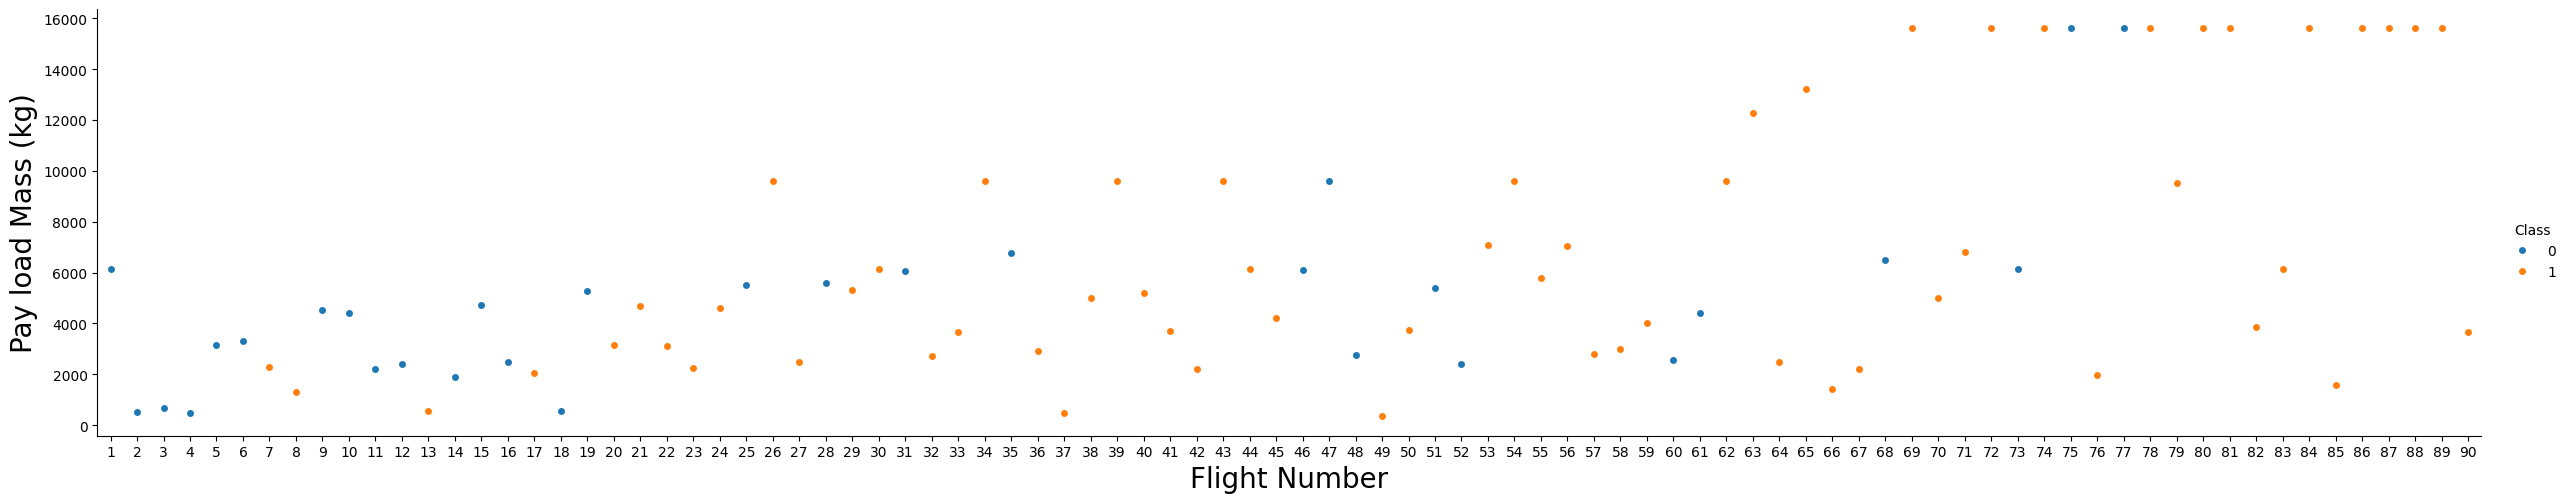

In [146]:
# Análise de como o PayloadMass e o número de cada voo afetam o sucesso da missão.

sns.catplot(y="PayloadMass", x="FlightNumber", hue="Class", data=df, aspect = 5)
plt.xlabel("Flight Number",fontsize=20)
plt.ylabel("Pay load Mass (kg)",fontsize=20)
plt.show()

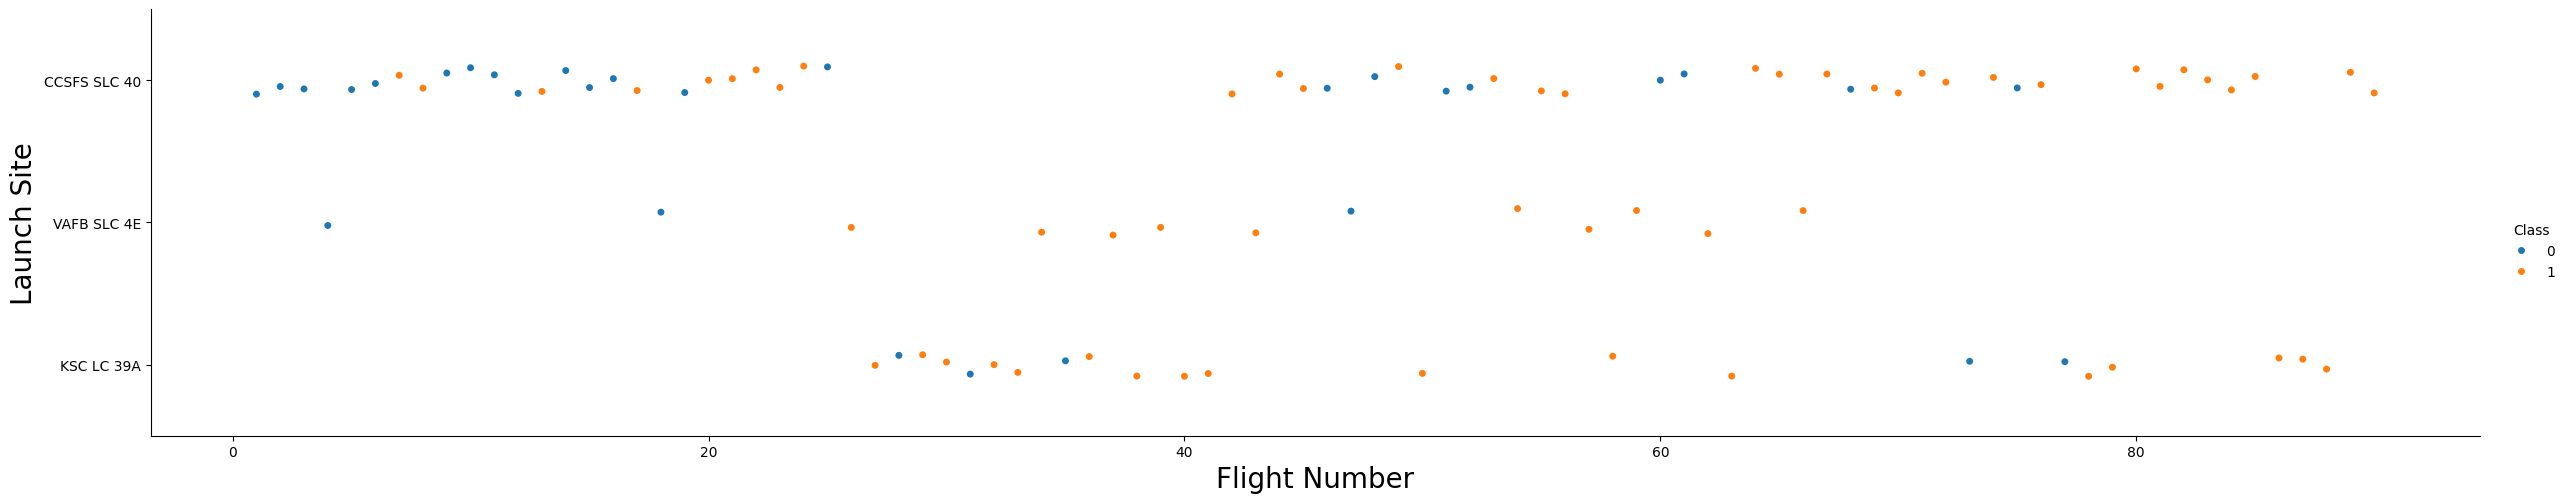

In [147]:
# Analisa como o número do voo e o local de lançamento influenciam o sucesso (Class).
sns.catplot(y="LaunchSite", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

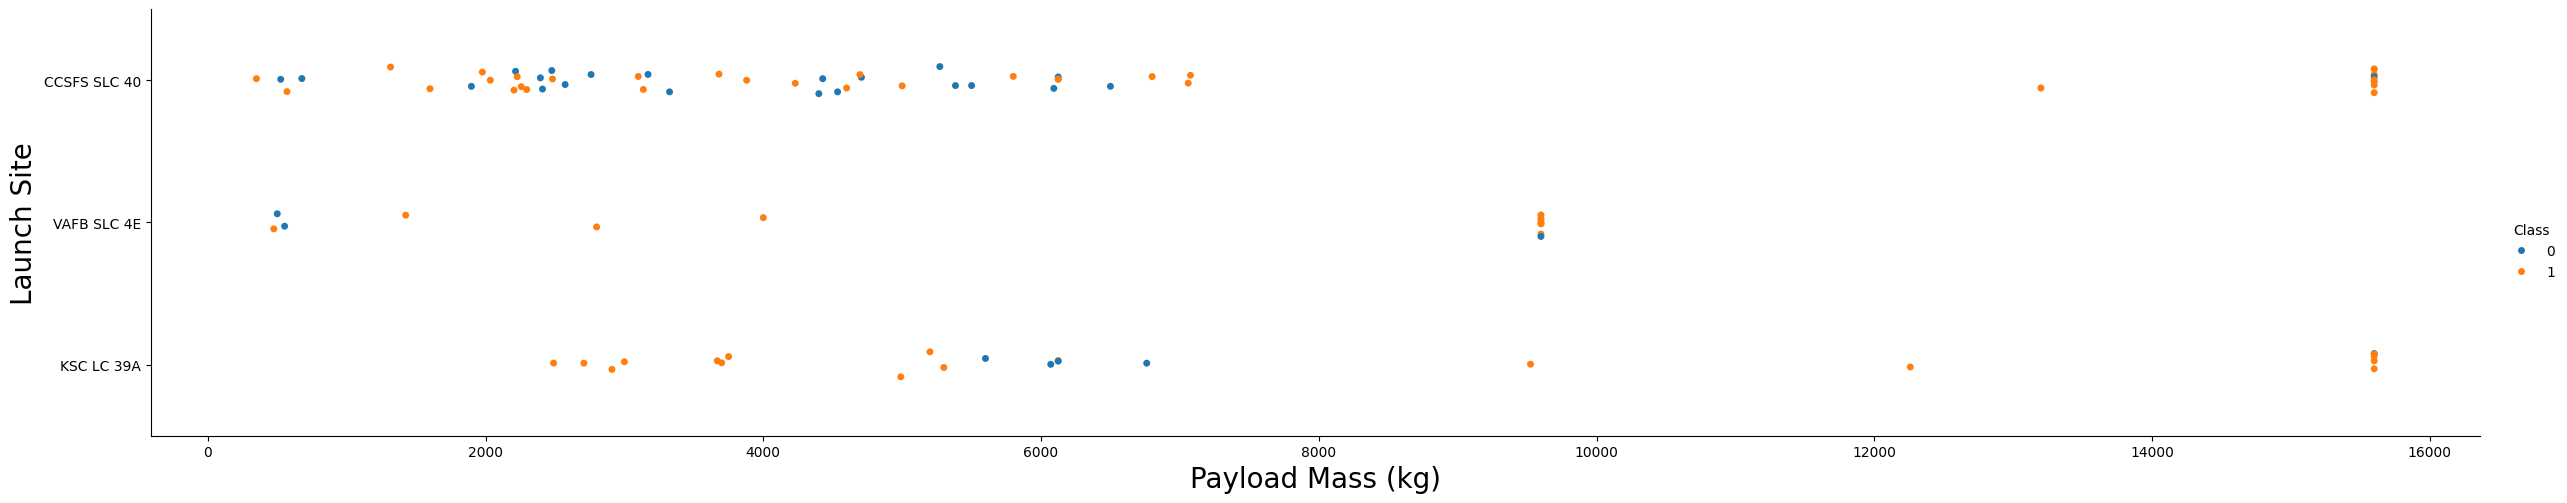

In [148]:
# Verifica se a massa da carga (PayloadMass) em diferentes locais de lançamento afeta o resultado.
sns.catplot(y="LaunchSite", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Launch Site", fontsize=20)
plt.show()

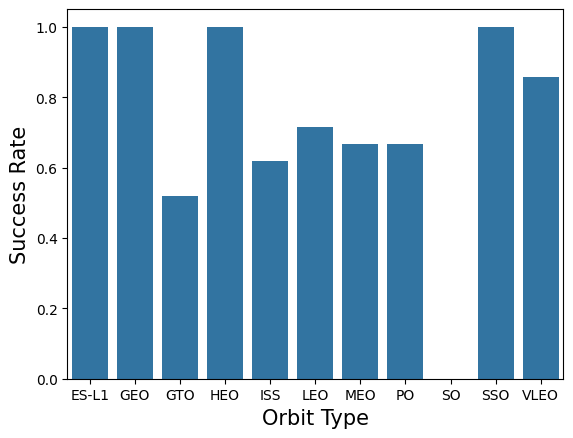

In [149]:
# Calcula a média de sucesso (Class) para cada tipo de órbita e exibe em um gráfico de barras.
df_orbit = df.groupby('Orbit')['Class'].mean().reset_index()
sns.barplot(x='Orbit', y='Class', data=df_orbit)
plt.xlabel("Orbit Type", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.show()

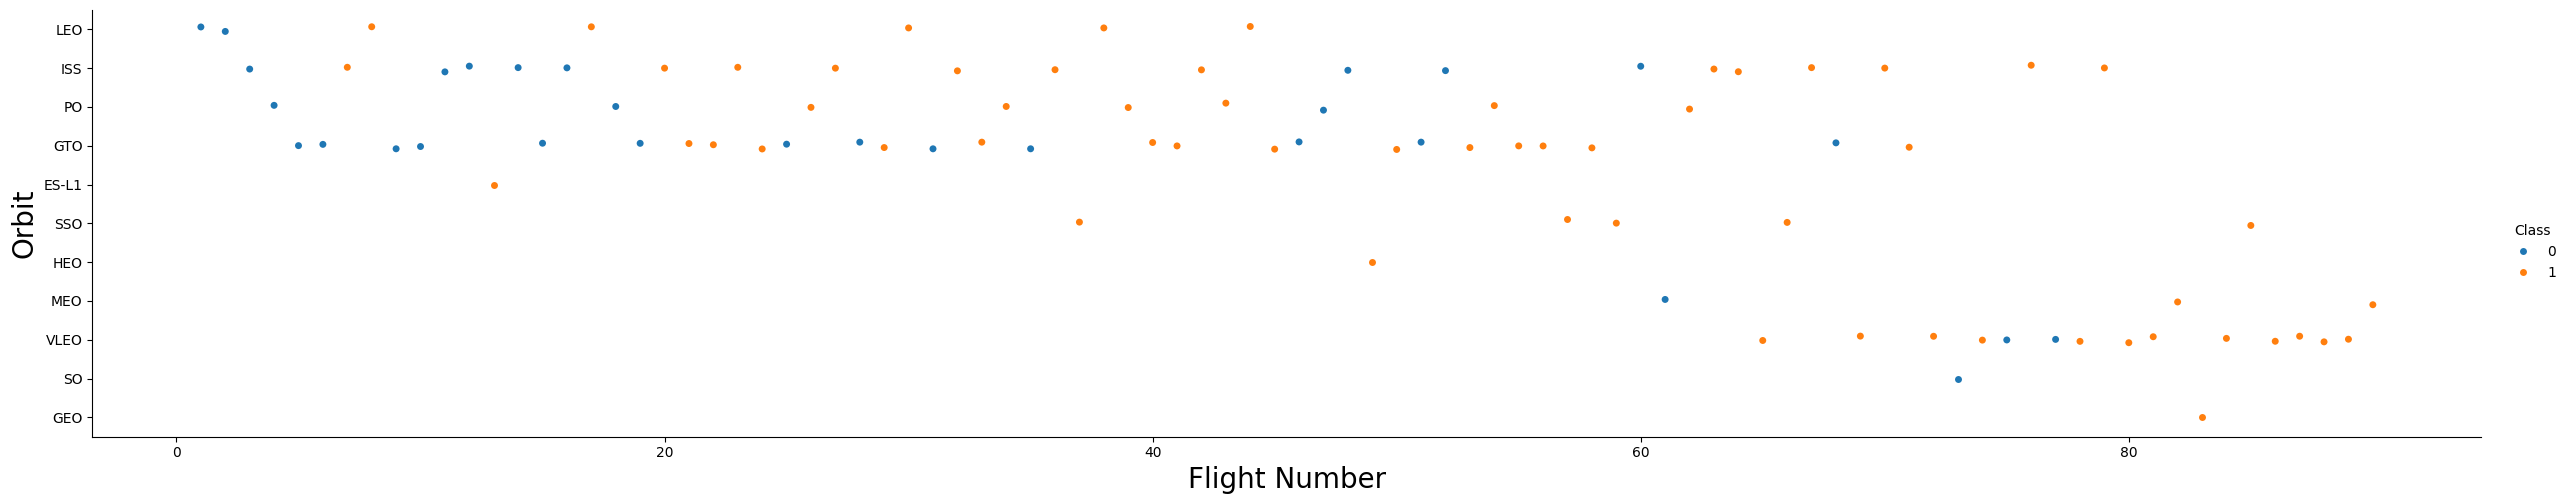

In [150]:
# Analisa a evolução do sucesso dos voos ao longo do tempo para cada tipo de órbita específico.
sns.catplot(y="Orbit", x="FlightNumber", hue="Class", data=df, aspect=5)
plt.xlabel("Flight Number", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

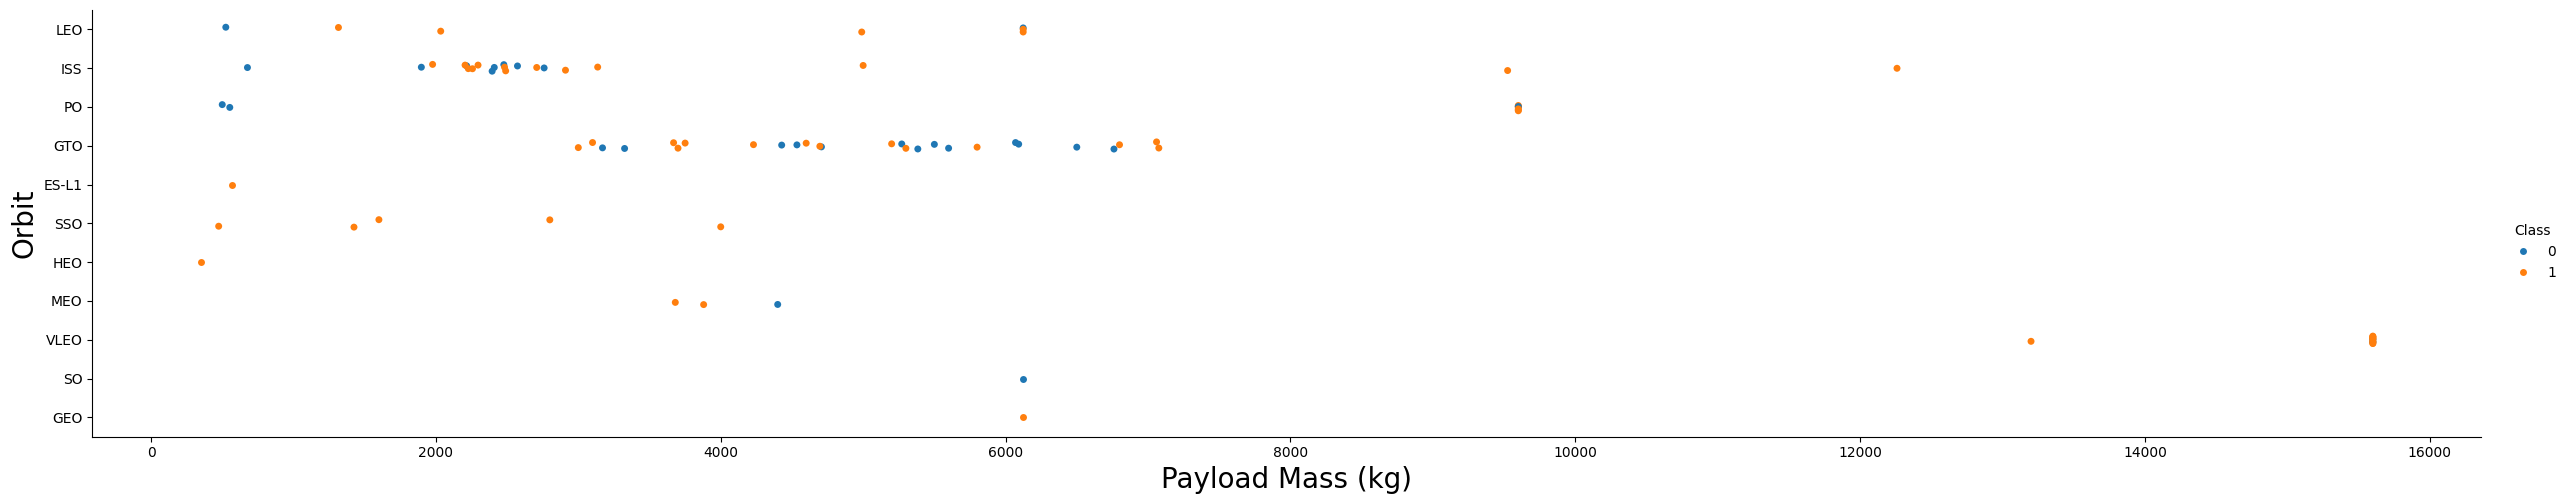

In [151]:
# Observa se o peso da carga influencia o sucesso do pouso dependendo da órbita de destino.
sns.catplot(y="Orbit", x="PayloadMass", hue="Class", data=df, aspect=5)
plt.xlabel("Payload Mass (kg)", fontsize=20)
plt.ylabel("Orbit", fontsize=20)
plt.show()

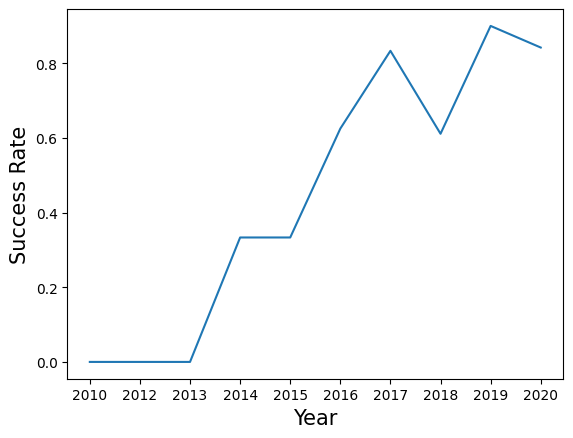

In [152]:
# Extrai o ano das datas e plota uma linha para visualizar a evolução da taxa de sucesso da SpaceX ao longo dos anos.
year=[]
def Extract_year(date):
    for i in df["Date"]:
        year.append(i.split("-")[0])
    return year

df['Year'] = Extract_year(df['Date'])
df_year = df.groupby('Year')['Class'].mean().reset_index()

sns.lineplot(x='Year', y='Class', data=df_year)
plt.xlabel("Year", fontsize=15)
plt.ylabel("Success Rate", fontsize=15)
plt.show()

In [153]:
# Transforma colunas categóricas (texto) em colunas binárias numéricas para que o modelo de ML possa processar.
features = df[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]

features_one_hot = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])

features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [154]:
# Garante que todos os dados numéricos do dataframe de features estejam no formato float64.
features_one_hot = features_one_hot.astype('float64')
features_one_hot.to_csv('dataset_p3.csv', index=False)
features_one_hot.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


---

# **Launch Sites Locations Analysis with Folium**

Agora utilizaremos a biblioteca ```Folium``` para fazer uma análise acerca dos locais de lançamentos mais apropriados e montar uma visualização estratégica deles no mapa.

In [166]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from folium.plugins import MousePosition
from folium.features import DivIcon
import wget

# Importando dataset.
spacex_csv_file = wget.download('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/spacex_launch_geo.csv')
spacex_df = pd.read_csv(spacex_csv_file)
spacex_df = spacex_df[['Launch Site', 'Lat', 'Long', 'class']]
launch_sites_df = spacex_df.groupby(['Launch Site'], as_index = False).first()
launch_sites_df = launch_sites_df[['Launch Site', 'Lat', 'Long']]

# Inicializar o mapa.

nasa_coordinate = [29.559684888503615, -95.0830971930759]
site_map = folium.Map(location=nasa_coordinate, zoom_start=10)
site_map = folium.Map(location = nasa_coordinate, zoom_start = 5)

# Para cada local de lançamento, adicionar um objeto Circle e Marker.
for index, row in launch_sites_df.iterrows():
    coordinate = [row['Lat'], row['Long']]
    
    # Adicionar Círculo.
    circle = folium.Circle(coordinate, radius = 1000, color="#0015d3", fill=True).add_child(folium.Popup(row['Launch Site']))
    
    # Adicionar Marcador com rótulo de texto.
    marker = folium.map.Marker(
        coordinate,
        icon=DivIcon(
            icon_size = (20,20),
            icon_anchor = (0,0),
            html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % row['Launch Site'],
        )
    )
    site_map.add_child(circle)
    site_map.add_child(marker)

site_map

In [156]:
# Cria a coluna marker_color .
def assign_marker_color(launch_outcome):
    if launch_outcome == 1:
        return 'green'
    else:
        return 'red'

spacex_df['marker_color'] = spacex_df['class'].apply(assign_marker_color)

# Adiciona o cluster ao mapa.
marker_cluster = MarkerCluster()
site_map.add_child(marker_cluster)

# Itera sobre o dataframe de lançamentos e adiciona marcadores ao cluster.
for index, record in spacex_df.iterrows():
    # Cria objeto Marker.
    marker = folium.Marker(
        location=[record['Lat'], record['Long']],
        icon=folium.Icon(color='white', icon_color=record['marker_color']),
        popup=f"Site: {record['Launch Site']} - {'Success' if record['class']==1 else 'Failed'}"
    )
    marker_cluster.add_child(marker)

site_map

In [157]:
from math import sin, cos, sqrt, atan2, radians

from math import sin, cos, sqrt, atan2, radians

def calculate_distance(lat1, lon1, lat2, lon2):
    # Raio aproximado da Terra em quilômetros.
    R = 6373.0

    # Converte graus decimais para radianos, pois as funções math.sin/cos exigem radianos.
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Diferença entre as coordenadas.
    dlon = lon2 - lon1
    dlat = lat2 - lat1

    # Fórmula de Haversine: calcula a "distância de círculo máximo".
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    # c é a distância angular em radianos.
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    return distance

# Define uma função JavaScript para formatar os números com 5 casas decimais.
formatter = "function(num) {return L.Util.formatNum(num, 5);};"

# Configura o plugin MousePosition.
mouse_position = MousePosition(
    position='topright',          
    separator=' Long: ',          
    empty_string='NaN',           
    lng_first=False,              
    num_digits=20,                
    prefix='Lat:',                
    lat_formatter=formatter,      
    lng_formatter=formatter,
)

# Adiciona a ferramenta ao mapa interativo.
site_map.add_child(mouse_position)

# Definição de coordenadas.
launch_site_lat, launch_site_lon = 34.63283, -120.61074 
coastline_lat, coastline_lon = 34.6352, -120.6253      

# Chamamento da função para obter a distância.
distance_coastline = calculate_distance(launch_site_lat, launch_site_lon, coastline_lat, coastline_lon)

# Marcador para mostrar a distância.
distance_marker = folium.Marker(
    [coastline_lat, coastline_lon],
    icon=DivIcon(
        icon_size=(20,20),
        icon_anchor=(0,0),
        html='<div style="font-size: 12; color:#d35400;"><b>%s</b></div>' % "{:10.2f} KM".format(distance_coastline),
    )
)
site_map.add_child(distance_marker)

# Desenha uma linha reta conectando o foguete até a costa.
lines = folium.PolyLine(
    locations=[[launch_site_lat, launch_site_lon], [coastline_lat, coastline_lon]], 
    weight=1  
)
site_map.add_child(lines)

---

# **Machine Learning Model to predict the land of a mission**

##### Agora, que já realizamos uma boa análise exploratória de nossos dados através de ferramentas de visualização de dados e de ferramentas que nos permitem ter uma lógica matemática robusta por trás dos fatores que influenciam o sucesso de uma missão da Space Y, nós iremos criar nosso modelo de ML visando prever a possibilidade de um foguete lançado aterrisar com segurança em terra.

##### Vide que o modelo é essencial para a replicação do sucesso da companhia, uma vez que quando possuímos determinada as chances de pousar com segurança, é possível estimar o quanto terá que ser gasto para uma missão, até mesmo se ela falhar.

In [158]:
# Importa as bibliotecas a serem utilizadas em nosso projeto.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import io
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Para facilitar a plotagem dos gráficos de análise e podermos focar mais nos conceitos inerentes ao nosso modelo, criaremos uma função
# que será responsável por plotar o gráfico de análise da matrix de confusão.

def plot_confusion_matrix(y,y_predict):
    "Essa função plota o gráfico de matrix de confusão"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

In [159]:
# Usa a biblioteca requests para obter os datasets de duas urls diferentes.

URL1 = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_2.csv"
response1 = requests.get(URL1)
df1 = pd.read_csv(io.BytesIO(response1.content))

URL2 = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DS0321EN-SkillsNetwork/datasets/dataset_part_3.csv'
response2 = requests.get(URL2)
X = pd.read_csv(io.BytesIO(response2.content))

In [160]:
# Criando um array para a coluna de classificação do resultado.
y = np.array(df1['Class'])
y

# Normalizando os dados de X.
transform = preprocessing.StandardScaler()
X = transform.fit_transform(X)

# Submetendo os nossos dados ao modelo, com uma divisão de 20% para testes e 80% para treino.
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=2)

parameters = {"C": [0.01, 0.1, 1], 'penalty': ['l2'], 'solver': ['lbfgs']}
lr = LogisticRegression()

# Criar o objeto GridSearchCV
logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)


C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\vinic\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\linear_model\_logistic.py:1135: FutureWarning: 'penalty' was deprecated in version 1.8 and will be removed in 1.10. To avoid this warning, leave 'penalty' set to its default value and use 'l1_ratio' or 'C' instead. Use l1_ratio=0 instead of penalty='l2', l1_ratio=1 instead of penalty='l1', and C=np.inf instead of penalty=None.
  warnings.warn(
C:\Users\vinic

,"estimator estimator: estimator objectThis is assumed to implement the scikit-learn estimator interface.Either estimator needs to provide a ``score`` function,or ``scoring`` must be passed.",LogisticRegression()
,"param_grid param_grid: dict or list of dictionariesDictionary with parameters names (`str`) as keys and lists ofparameter settings to try as values, or a list of suchdictionaries, in which case the grids spanned by each dictionaryin the list are explored. This enables searching over any sequenceof parameter settings.","{'C': [0.01, 0.1, ...], 'penalty': ['l2'], 'solver': ['lbfgs']}"
,"scoring scoring: str, callable, list, tuple or dict, default=NoneStrategy to evaluate the performance of the cross-validated model onthe test set.If `scoring` represents a single score, one can use:- a single string (see :ref:`scoring_string_names`);- a callable (see :ref:`scoring_callable`) that returns a single value;- `None`, the `estimator`'s :ref:`default evaluation criterion ` is used.If `scoring` represents multiple scores, one can use:- a list or tuple of unique strings;- a callable returning a dictionary where the keys are the metric names and the values are the metric scores;- a dictionary with metric names as keys and callables as values.See :ref:`multimetric_grid_search` for an example.",None
,"n_jobs n_jobs: int, default=NoneNumber of jobs to run in parallel.``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.``-1`` means using all processors. See :term:`Glossary `for more details... versionchanged:: v0.20 `n_jobs` default changed from 1 to None",None
,"refit refit: bool, str, or callable, default=TrueRefit an estimator using the best found parameters on the wholedataset.For multiple metric evaluation, this needs to be a `str` denoting thescorer that would be used to find the best parameters for refittingthe estimator at the end.Where there are considerations other than maximum score inchoosing a best estimator, ``refit`` can be set to a function whichreturns the selected ``best_index_`` given ``cv_results_``. In thatcase, the ``best_estimator_`` and ``best_params_`` will be setaccording to the returned ``best_index_`` while the ``best_score_``attribute will not be available.The refitted estimator is made available at the ``best_estimator_``attribute and permits using ``predict`` directly on this``GridSearchCV`` instance.Also for multiple metric evaluation, the attributes ``best_index_``,``best_score_`` and ``best_params_`` will only be available if``refit`` is set and all of them will be determined w.r.t this specificscorer.See ``scoring`` parameter to know more about multiple metricevaluation.See :ref:`sphx_glr_auto_examples_model_selection_plot_grid_search_digits.py`to see how to design a custom selection strategy using a callablevia `refit`.See :ref:`this example`for an example of how to use ``refit=callable`` to balance modelcomplexity and cross-validated score... versionchanged:: 0.20 Support for callable added.",True
,"cv cv: int, cross-validation generator or an iterable, default=NoneDetermines the cross-validation splitting strategy.Possible inputs for cv are:- None, to use the default 5-fold cross validation,- integer, to specify the number of folds in a `(Stratified)KFold`,- :term:`CV splitter`,- An iterable yielding (train, test) splits as arrays of indices.For integer/None inputs, if the estimator is a classifier and ``y`` iseither binary or multiclass, :class:`StratifiedKFold` is used. In allother cases, :class:`KFold` is used. These splitters are instantiatedwith `shuffle=False` so the splits will be the same across calls.Refer :ref:`User Guide ` for the variouscross-validation strategies that can be used here... versionchanged:: 0.22 ``cv`` default value if None changed from 3-fold to 5-fold.",10
,"verbose verbose: intControls the verbosity: the higher, the more messages.- >1 : the computation time for each fold and parameter candidate is displayed;- >2 : the score is also displayed;- >3 : t

LR - Best parameters) {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}.
LR - Accuracy validation: 84.64%.


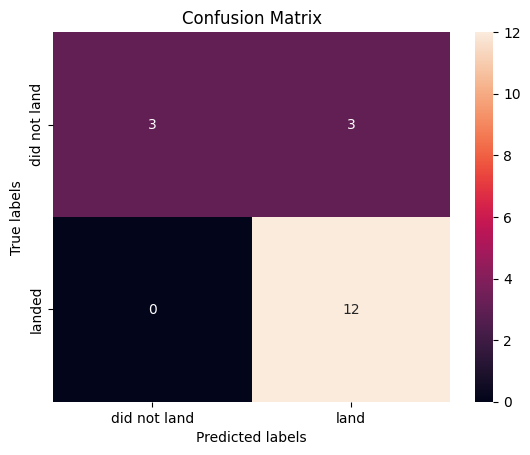

In [161]:
# Cálculo da matrix de confusão.

print(f"LR - Best parameters) {logreg_cv.best_params_}.")
print(f"LR - Accuracy validation: {(logreg_cv.best_score_*100):.2f}%.")

yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

In [162]:
# Parâmetros para testar no SVM
parameters_svm = {
    'kernel': ('linear', 'rbf', 'poly', 'sigmoid'),
    'C': np.logspace(-3, 3, 5),
    'gamma': np.logspace(-3, 3, 5)
}

svm = SVC()

# Configuração do GridSearchCV
svm_cv = GridSearchCV(svm, parameters_svm, cv=10)
svm_cv.fit(X_train, Y_train)

print(f"SVM - Best parameters: {svm_cv.best_params_}.")
print(f"SVM - Accuracy validation: {(svm_cv.best_score_*100):.2f}%.")

# Acurácia nos dados de teste
print(f"SVM - Accuracy test data: {(svm_cv.score(X_test, Y_test)*100):.2f}%.")

SVM - Best parameters: {'C': np.float64(1.0), 'gamma': np.float64(0.03162277660168379), 'kernel': 'sigmoid'}.
SVM - Accuracy validation: 84.82%.
SVM - Accuracy test data: 83.33%.


Tree - Best parameters: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'splitter': 'random'}.
Tree - Accuracy validation: 86.07%.
Tree - Accuracy test data: 83.33%.


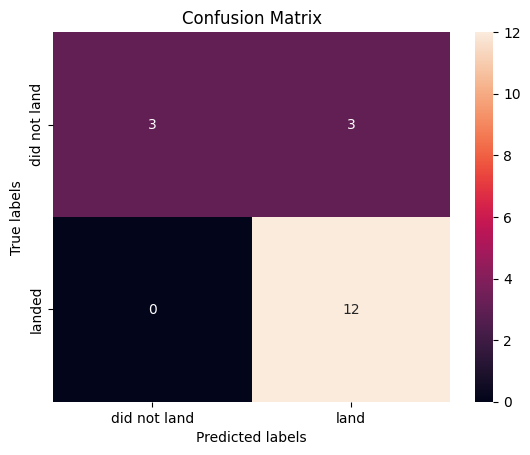

In [163]:
# Aplicando e configurando o modelo de árvore de decisão.

parameters_tree = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [2*n for n in range(1,10)],
    'max_features': ['sqrt'], 
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10]
}
tree = DecisionTreeClassifier()

tree_cv = GridSearchCV(tree, parameters_tree, cv=10)
tree_cv.fit(X_train, Y_train)

print(f"Tree - Best parameters: {tree_cv.best_params_}.")
print(f"Tree - Accuracy validation: {(tree_cv.best_score_*100):.2f}%.")

# Acurácia nos dados de teste
print(f"Tree - Accuracy test data: {(tree_cv.score(X_test, Y_test)*100):.2f}%.")

yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

KNN - Best parameters: {'algorithm': 'auto', 'n_neighbors': 10, 'p': 1}.
KNN - Accuracy validation: 84.82%.
KNN - Accuaracy test data: 83.33%.


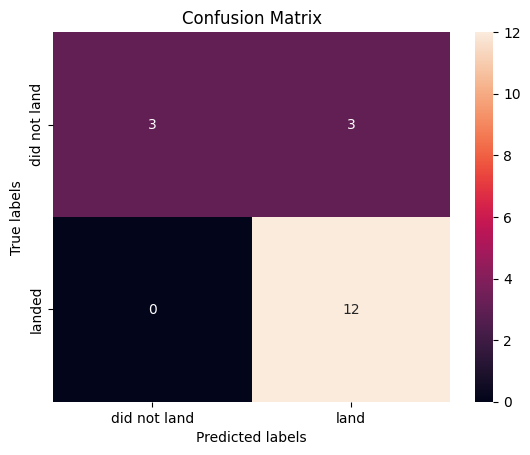

In [164]:
# Aplicando o modelo de K-Neighbours
parameters_knn = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

knn = KNeighborsClassifier()

knn_cv = GridSearchCV(knn, parameters_knn, cv=10)
knn_cv.fit(X_train, Y_train)

print(f"KNN - Best parameters: {knn_cv.best_params_}.")
print(f"KNN - Accuracy validation: {(knn_cv.best_score_*100):.2f}%.")

# Acurácia nos dados de teste
print(f"KNN - Accuaracy test data: {(knn_cv.score(X_test, Y_test)*100):.2f}%.")

yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

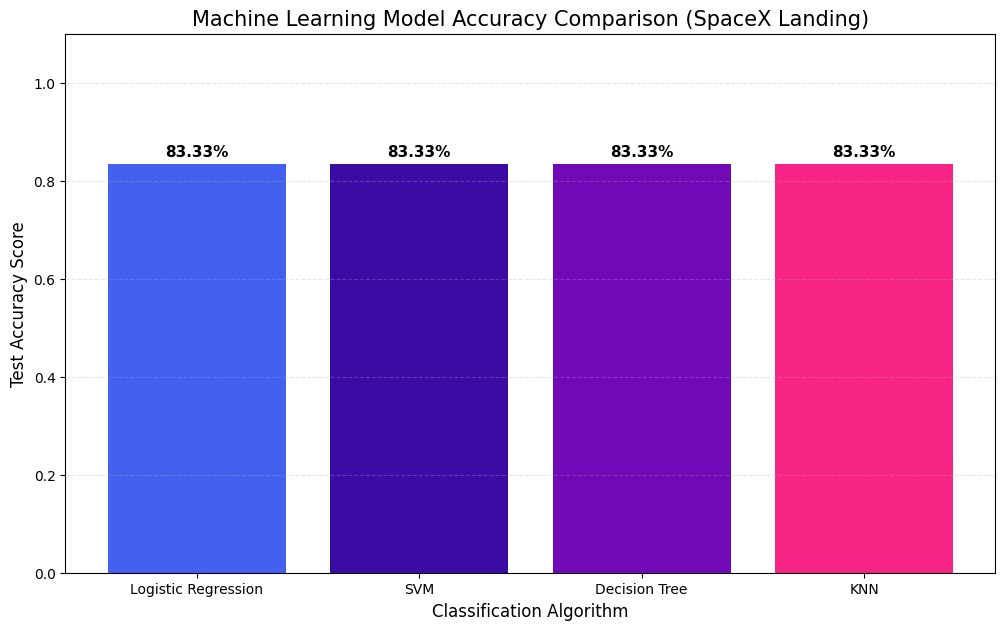


Conclusion: The bests performing methods are Logistic Regression, SVM & KNN with a test accuracy of 83.33%.


In [165]:
# Criando o dicionário com o score de cada gráfico.
methods = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
test_accuracy = [
    logreg_cv.score(X_test, Y_test),
    svm_cv.score(X_test, Y_test),
    tree_cv.score(X_test, Y_test),
    knn_cv.score(X_test, Y_test)
]

# Gerando o gráfico de comparação entre todos os scores.
plt.figure(figsize=(12, 7))
colors = ['#4361ee', '#3a0ca3', '#7209b7', '#f72585']
bars = plt.bar(methods, test_accuracy, color=colors)

# Adicionando os percentuais.
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{(height*100):.2f}%', ha='center', va='bottom', fontsize=11, fontweight='bold')

# Definindo título, nomes dos eixos e ademais
plt.title('Machine Learning Model Accuracy Comparison (SpaceX Landing)', fontsize=15)
plt.ylabel('Test Accuracy Score', fontsize=12)
plt.xlabel('Classification Algorithm', fontsize=12)
plt.ylim(0, 1.1)  
plt.grid(axis='y', linestyle='--', alpha=0.3)
plt.show()

# Identificando a melhor performance.
print(f"\nConclusion: The bests performing methods are Logistic Regression, SVM & KNN with a test accuracy of 83.33%.")